In [10]:
import tensorflow as tf
import tools.mnist3 as mnist_tools
import tools.svhn as svhn_tools
import tools.semisup as semisup
import numpy as np
import architectures as arch
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
mnist_train_images, mnist_train_labels = mnist_tools.get_data('train')
mnist_test_images, mnist_test_labels = mnist_tools.get_data('test')
svhn_train_images, svhn_train_labels = svhn_tools.get_data('train')
svhn_test_images, svhn_test_labels = svhn_tools.get_data('test')

Extracting /home/frankzl/datasets/mnist/train-images-idx3-ubyte.gz
Extracting /home/frankzl/datasets/mnist/train-labels-idx1-ubyte.gz
Extracting /home/frankzl/datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/frankzl/datasets/mnist/t10k-labels-idx1-ubyte.gz


In [12]:
# labeled samples used per class
sup_per_class = 10
sup_seed = -1
# labeled samples per class per batch
sup_per_batch = 10
unsup_batch_size = 100


NUM_LABELS = mnist_tools.NUM_LABELS
IMAGE_SHAPE = mnist_tools.IMAGE_SHAPE
seed = 1

# gets sup_per_class samples for each class
# [10 (classes), 10 (samples), 28, 28, 1]
sup_by_label = semisup.sample_by_label(svhn_train_images, svhn_train_labels,
                        sup_per_class, NUM_LABELS, seed)

In [13]:
len(sup_by_label)

10

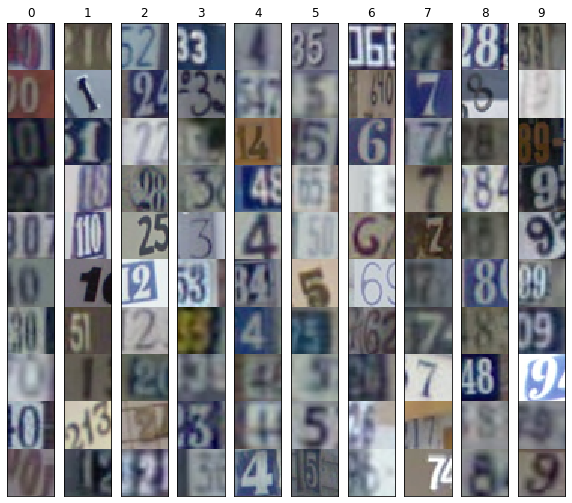

In [14]:
import tools.visualization as vis
vis.imshow(sup_by_label, labels=list(range(0,10)), num_row=10, imgwidth=32, channels=3)

In [15]:
import tools.updated_semisup as up

graph = tf.Graph()

with graph.as_default():
    unsup_data = up.create_input(mnist_train_images, mnist_train_labels, unsup_batch_size)
    unsup_it   = unsup_data.make_initializable_iterator()
    
    t_unsup_images,_ = unsup_it.get_next()
    
    sup_data = up.create_per_class_inputs(sup_by_label, sup_per_batch)
    sup_it   = sup_data.make_one_shot_iterator()
    
    item       = sup_it.get_next()
    temp_unzip = (list(zip(*item)))
    t_sup_images, t_sup_labels = tf.concat(temp_unzip[0], 0), tf.concat(temp_unzip[1], 0)

with tf.Session(graph=graph) as sess:
    
    sess.run(unsup_it.initializer)
    sess.run(tf.global_variables_initializer())
    
    unsup, x,y = sess.run([t_unsup_images, t_sup_images, t_sup_labels])


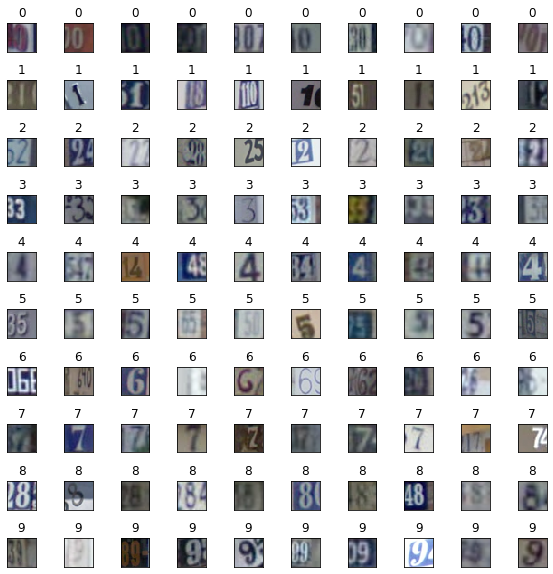

In [16]:
#vis.imshow(x, list(y), num_row=10)
vis.imshow(x, labels=list(y), num_row=10, imgwidth=32, channels=3)

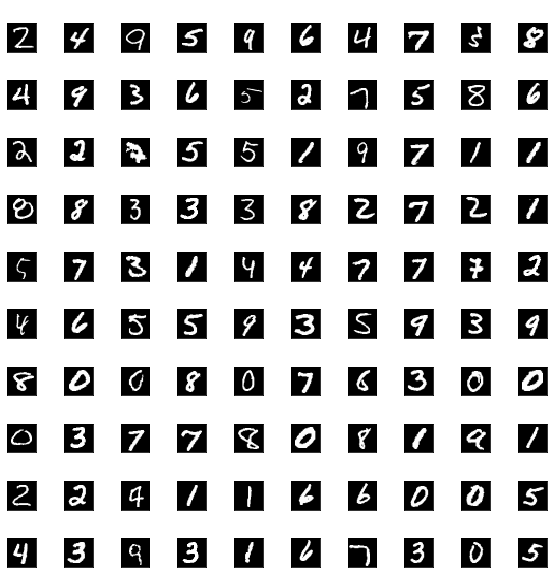

In [18]:
vis.imshow(list(unsup), num_row=10, imgwidth=28, channels=3)